In [2]:
import cooler
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import itertools

In [5]:
import bioframe

In [6]:
from bioframe.io import resources

In [69]:


# the control - normal human cells - parental cells line (perfect ctrl)
ctr = cooler.Cooler("/home/venevs/Cancer/Ctrl_1Mb.mcool::/resolutions/1000000")

# 11 - transloc 4o and 8q; 2p - 20q
sam11 = cooler.Cooler("/home/venevs/Cancer/Sample11_4p-8q_2p-20q.1Mb.mcool::/resolutions/1000000")

# 6a - transloc 4 and 6; 5 and X and maybe isochrom - 2p
sam6a = cooler.Cooler("/home/venevs/Cancer/Sample6a_iso2p_4-6_5-X.1Mb.mcool::/resolutions/1000000")

# 6b - transloc 4 and 6 and maybe isochrom - 2p
sam6b = cooler.Cooler("/home/venevs/Cancer/Sample6b_iso2p_4-6.1Mb.mcool::/resolutions/1000000")



# c = cooler.Cooler("rao204.2mb.cool")
c = ctr
hh = c.matrix(balance=False,as_pixels=True,sparse=True)

In [70]:
# "GRCh38"
ff = resources.fetch_gaps("hg19")
# when chroms do not start with 'chr' ...
ff["chrom"] = ff.chrom.str.lstrip("chr")

In [71]:
cents = ff[ff["type"]=="centromere"].set_index("chrom").reindex(c.chromnames[:-3])
splt = (0.5*(cents["start"]+cents["end"])).astype(int)
arms = bioframe.tools.split_chromosomes(c.chromsizes,splt)
# arms

In [45]:
# arms = bioframe.tools.split_chromosomes(c.chromsizes,splt)

Text(0.5, 1.0, 'cis, inter-arm level - kinda trans')

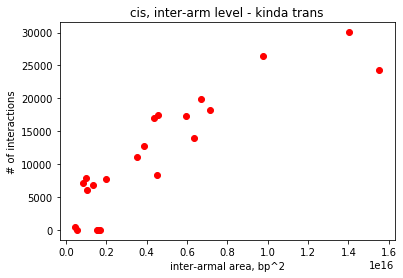

In [73]:
# cis but inter-arm

grp = arms.groupby("chrom")

x = []
y = []
for g in grp.groups:
    # print(_c0,_s,_e)
    _c1,_s1,_e1,_ = grp.get_group(g).iloc[0]
    _c2,_s2,_e2,_ = grp.get_group(g).iloc[1]
    _size1 = _e1-_s1
    _size2 = _e2-_s2
    #     if _size > 4_000_000:
    _x = float(_size1)*float(_size2)
    _y = hh.fetch((_c1,_s1,_e1),(_c2,_s2,_e2))["count"].sum()
    x.append(_x)
    y.append(_y)
    
    
plt.plot(x,y,"ro")
plt.gca().set_xlabel("inter-armal area, bp^2")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title("cis, inter-arm level - kinda trans")

Text(0.5, 1.0, 'cis, chromosome-arm level')

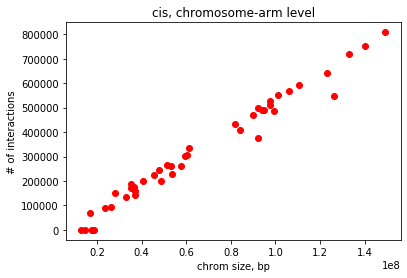

In [74]:
# cis - by-arm ...

x = []
y = []
for _c0,_s,_e in arms[["chrom","start","end"]].itertuples(index=False):
    # print(_c0,_s,_e)
    # if _size > 4_000_000:
    _size = _e-_s
    _x = float(_size)
    _y = hh.fetch((_c0,_s,_e))["count"].sum()
    x.append(_x)
    y.append(_y)
        
plt.plot(x,y,"ro")
plt.gca().set_xlabel("chrom size, bp")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title("cis, chromosome-arm level")

Text(0.5, 1.0, 'trans, chromosome-arm level, 924 points')

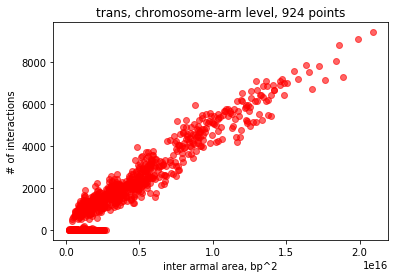

In [76]:
# inter chromosomal - by-arm ... - whatever ...

x = []
y = []
N = 0
for _tup1,_tup2 in itertools.combinations(arms[["chrom","start","end"]].itertuples(index=False),2):
    _c1,_s1,_e1 = _tup1
    _c2,_s2,_e2 = _tup2
    _size1 = _e1-_s1
    _size2 = _e2-_s2
    if ( _c1 != _c2 ) and ( min(_size1,_size2)>3_000_000 ):
        _x = float(_size1)*float(_size2)
        _y = hh.fetch((_c1,_s1,_e1),(_c2,_s2,_e2))["count"].sum()
        x.append(_x)
        y.append(_y)
        N += 1
        
plt.plot(x,y,"ro",alpha=0.6)
plt.gca().set_xlabel("inter armal area, bp^2")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title(f"trans, chromosome-arm level, {N} points")

Text(0.5, 1.0, 'trans interactions, chromosome level')

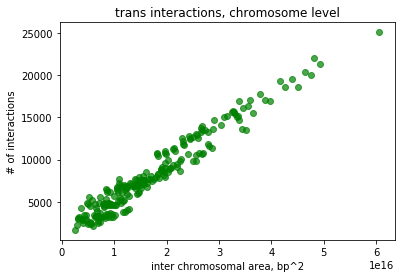

In [77]:
# trans interactions (whole chromosome ...)

x = []
y = []
for _c0,_c2 in itertools.combinations(c.chromnames[:-3],2):
    _x = float(c.chromsizes[_c0])*c.chromsizes[_c2]
    _y = hh.fetch(_c0,_c2)["count"].sum()
    x.append(_x)
    y.append(_y)
    
plt.plot(x,y,"go",alpha=0.7)
plt.gca().set_xlabel("inter chromosomal area, bp^2")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title("trans interactions, chromosome level")

Text(0.5, 1.0, 'cis interactions, chromosome level')

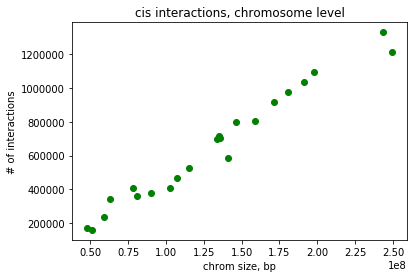

In [78]:
# cis interactions - whole chromosome ...

x = []
y = []
for chrom in c.chromnames[:-3]:
    _x = c.chromsizes[chrom]
    _y = hh.fetch(chrom)["count"].sum()
    x.append(_x)
    y.append(_y)
    
plt.plot(x,y,"go")
plt.gca().set_xlabel("chrom size, bp")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title("cis interactions, chromosome level")